In [1]:
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [2]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

#reproducible results
import random

#feature selection
from sklearn.feature_selection import RFE

In [3]:
# CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


print(tf.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
2.4.0


In [4]:
# Fix random seeds for Reproducibility

SEED = 888

tf.random.set_random_seed(SEED)

np.random.seed(SEED)

rn.seed(SEED)

## Importing dataset

In [5]:

dataset = pd.read_csv('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Extracted CSVs/from FeatureExtraction/Data-3/D3_finaldata_updated.csv')



In [6]:
dataset

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,29,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,1,21,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,8,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,1,6,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,polska-olx.pl,0,0,0,2,0,0,0,1,0,1,1,1,0,6,0,1
11996,fb-updates-1000151020200412545154000588-mc.tk,0,0,1,1,0,0,0,1,0,1,1,1,0,4,0,1
11997,whattsapps.misecure.com,0,0,0,0,0,0,0,0,0,0,0,1,0,4,1,1
11998,nfta.co.za,0,0,1,2,0,0,0,0,0,1,1,1,1,5,1,1


## EDA

In [7]:
# Look for missing values
dataset.isnull().sum()   

# No missing values found, so no need to drop or replace any value

domain               0
ip_present           0
at_present           0
url_length           0
url_depth            0
redirection          0
https_domain         0
short_url            0
prefix/suffix        0
dns_record           0
web_traffic          0
domain_age           0
domain_end           0
dot_count            0
specialchar_count    0
subdom_count         0
label                0
dtype: int64

In [8]:
# Count class label

dataset['label'].value_counts()

# 0 Legitimate
# 1 Phishing

0    6000
1    6000
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

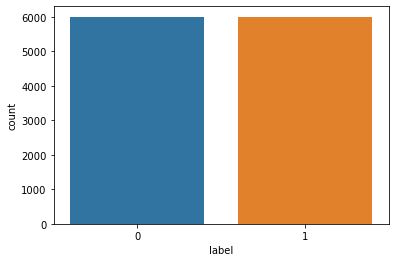

In [9]:
sns.countplot(x= 'label' , data = dataset)

In [10]:
dataset.columns

Index(['domain', 'ip_present', 'at_present', 'url_length', 'url_depth',
       'redirection', 'https_domain', 'short_url', 'prefix/suffix',
       'dns_record', 'web_traffic', 'domain_age', 'domain_end', 'dot_count',
       'specialchar_count', 'subdom_count', 'label'],
      dtype='object')

In [11]:
dataset.describe()

,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
count,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000
mean,0.0,0.024333,0.731083,2.657000,0.012667,0.0,0.095833,0.155917,0.048667,0.840333,0.528917,0.842667,0.239083,7.95650,0.287917,0.500000
std,0.0,0.154088,0.443415,2.126004,0.111836,0.0,0.294375,0.362791,0.215179,0.366312,0.499184,0.364130,0.426542,5.19601,0.452811,0.500021
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.00000,0.000000,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,7.00000,0.000000,0.500000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,9.00000,1.000000,1.000000
max,0.0,1.000000,1.000000,20.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,169.00000,1.000000,1.000000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   domain             12000 non-null  object
 1   ip_present         12000 non-null  int64 
 2   at_present         12000 non-null  int64 
 3   url_length         12000 non-null  int64 
 4   url_depth          12000 non-null  int64 
 5   redirection        12000 non-null  int64 
 6   https_domain       12000 non-null  int64 
 7   short_url          12000 non-null  int64 
 8   prefix/suffix      12000 non-null  int64 
 9   dns_record         12000 non-null  int64 
 10  web_traffic        12000 non-null  int64 
 11  domain_age         12000 non-null  int64 
 12  domain_end         12000 non-null  int64 
 13  dot_count          12000 non-null  int64 
 14  specialchar_count  12000 non-null  int64 
 15  subdom_count       12000 non-null  int64 
 16  label              12000 non-null  int64

In [13]:
# Shuffle
# shuffle dataset **once**, but reliably so that each run yields the same results

data = shuffle(dataset, random_state=42)

data

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
1935,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,0,6,0,0
6494,78.143.96.35,0,0,1,3,0,0,0,0,0,1,0,1,1,19,1,1
1720,superuser.com,0,0,1,3,0,0,0,0,0,1,0,1,0,6,0,0
9120,heylink.me,0,0,0,1,0,0,1,0,0,1,0,1,0,4,0,1
360,torrentdn.com,0,0,1,2,0,0,0,0,0,1,1,1,0,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,vmi330298.contaboserver.net,0,0,0,3,0,0,0,0,0,1,0,1,1,6,1,1
5191,censor.net.ua,0,0,1,3,0,0,0,0,0,0,0,1,0,17,1,0
5390,udn.com,0,0,1,4,0,0,0,0,0,1,0,1,0,7,0,0
860,seekingalpha.com,0,0,1,2,0,0,0,0,0,1,0,1,0,5,0,0


## Feature Selection

#### Important: In all feature selection method, it is a good practice to select the features by examining only the training set to avoid overfitting

In [14]:
y = pd.DataFrame(data['label']) #y target
X = data.drop(['domain', 'label'], axis=1) #X feature

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size=0.4, random_state=12345)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=113)


X_train.shape, X_test.shape, X_val.shape

((7200, 15), (2400, 15), (2400, 15))

In [15]:

## Original dataset
y_legw = y.label.value_counts()[0]/(y.label.count())
y_phishw = y.label.value_counts()[1]/(y.label.count())

print("********************** Proportion on the give dataset before the split ********************** \n")
print("Percentage of Legitimate websites :", y_legw)
print("Percentage of Phishing websites   :", y_phishw, "\n")


## Training dataset
y_train_legw = y_train.label.value_counts()[0]/(y_train.label.count())
y_train_phishw = y_train.label.value_counts()[1]/(y_train.label.count())

print("********************** Proportion on the Training datase t**********************\n")
print("Percentage of Legitimate websites :", y_train_legw)
print("Percentage of Phishing websites   :", y_train_phishw, "\n")


## Testing dataset
y_test_legw = y_test.label.value_counts()[0]/(y_test.label.count())
y_test_phishw = y_test.label.value_counts()[1]/(y_test.label.count())

print("********************** Proportion on the Testing dataset **********************\n")
print("Percentage of Legitimate websites :", y_test_legw)
print("Percentage of Phishing websites   :", y_test_phishw, "\n")


## Validation dataset
y_val_legw = y_val.label.value_counts()[0]/(y_val.label.count())
y_val_phishw = y_val.label.value_counts()[1]/(y_val.label.count())

print("********************** Proportion on the Testing dataset **********************\n")
print("Percentage of Legitimate websites :", y_val_legw)
print("Percentage of Phishing websites   :", y_val_phishw, "\n")



********************** Proportion on the give dataset before the split ********************** 

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 

********************** Proportion on the Training datase t**********************

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 

********************** Proportion on the Testing dataset **********************

Percentage of Legitimate websites : 0.49666666666666665
Percentage of Phishing websites   : 0.5033333333333333 

********************** Proportion on the Testing dataset **********************

Percentage of Legitimate websites : 0.5033333333333333
Percentage of Phishing websites   : 0.49666666666666665 



In [16]:

## Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")

print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 12000 rows and 15 columns

Dimensions of the training dataset : 7200 rows and 15 columns

Dimensions of the testing dataset : 2400 rows and 15 columns

Dimensions of the validation dataset : 2400 rows and 15 columns



In [17]:
# Converting target variables from dataframe to an array

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_val = np.ravel(y_val)


In [18]:
y_train, y_test, y_val

(array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 1, 0]),
 array([0, 0, 1, ..., 1, 1, 1]))

## Feature Selection

In [45]:
# Define feature selection
from sklearn.feature_selection import f_classif,SelectKBest, chi2

f_score = chi2(X_train.fillna(0), y_train)
f_score

(array([           nan, 1.10720930e+02, 7.17262077e+02, 1.10204202e+03,
        4.86486486e-01,            nan, 6.68809524e+01, 1.02844535e+03,
        3.38102857e+02, 2.89845547e-01, 3.45581638e+01, 3.03214169e+01,
        4.88391153e+02, 5.67211392e+02, 9.60596107e+02]),
 array([            nan, 6.81150553e-026, 5.27250147e-158, 1.18867543e-241,
        4.85498803e-001,             nan, 2.88408145e-016, 1.17857833e-225,
        1.65210602e-075, 5.90319524e-001, 4.13702827e-009, 3.66061627e-008,
        3.19065736e-108, 2.26942813e-125, 6.59818359e-211]))

In [47]:

pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

url_depth            1.188675e-241
prefix/suffix        1.178578e-225
subdom_count         6.598184e-211
url_length           5.272501e-158
specialchar_count    2.269428e-125
dot_count            3.190657e-108
dns_record            1.652106e-75
at_present            6.811506e-26
short_url             2.884081e-16
domain_age            4.137028e-09
domain_end            3.660616e-08
redirection           4.854988e-01
web_traffic           5.903195e-01
ip_present                     NaN
https_domain                   NaN
dtype: float64

In [48]:
sel_ = SelectKBest(chi2, k=12).fit(X_train, y_train)

In [49]:
X_train.columns[sel_.get_support()]

Index(['at_present', 'url_length', 'url_depth', 'redirection', 'short_url',
       'prefix/suffix', 'dns_record', 'domain_age', 'domain_end', 'dot_count',
       'specialchar_count', 'subdom_count'],
      dtype='object')

In [52]:

#Transform to dataframe to remove the remaining features

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
X_val = scaler.transform(X_val
                        )


In [54]:
X_train.shape

(7200, 15)

In [42]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(13,columns="Score"))

       Input_Features        Score  P_Value
2          url_length  6981.165885   0.0000
14       subdom_count  2833.733646   0.0000
7       prefix/suffix  2517.624629   0.0000
3           url_depth  1303.478753   0.0000
12          dot_count  1179.012616   0.0000
8          dns_record   614.652027   0.0000
11         domain_end   348.412602   0.0000
13  specialchar_count   274.333613   0.0000
1          at_present   188.569556   0.0000
10         domain_age   134.637631   0.0000
6           short_url    99.279618   0.0000
4         redirection     1.705776   0.1916
9         web_traffic     0.000000   1.0000


In [ ]:
# features to keep to feed the model

X_train_sel

In [30]:
features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T


In [31]:
X_train_unique.shape, X_train.shape

((7200, 12), (7200, 15))

In [32]:
# F Test

sel = f_classif(X_train_unique, y_train)
sel

(array([1.15214270e+02, 4.21547527e+03, 7.44968973e+02, 7.45086249e+01,
        1.46167830e+03, 3.73725861e+02, 1.87329552e+00, 7.46672688e+01,
        2.03655799e+02, 7.03987762e+02, 1.97067872e+02, 1.65241477e+03]),
 array([1.12353375e-026, 0.00000000e+000, 3.57886965e-156, 7.34915093e-018,
        2.48851027e-291, 3.22498137e-081, 1.71140828e-001, 6.78728192e-018,
        1.38736775e-045, 4.46762936e-148, 3.47438106e-044, 0.00000000e+000]))

In [33]:
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending = True, inplace = True)

<AxesSubplot:>

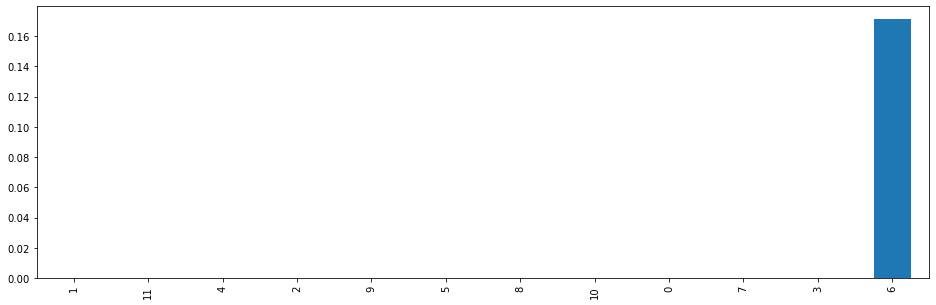

In [34]:
p_values.plot.bar(figsize = (16, 5))


In [ ]:
X_val_sel

In [ ]:
#train_data - X_train
#test_data - X_test
#train_target - y_train
#test_target - y_test

## Normalize data using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## Selected features
X_train_sel = scaler.fit_transform(X_train_sel)
X_test_sel = scaler.transform(X_test_sel) 
X_val_sel = scaler.transform(X_val_sel)



In [ ]:
X_train_sel

In [ ]:
type(X_train_sel)

In [ ]:
X_test_sel

In [ ]:
type(X_test_sel)

In [ ]:
X_val_sel

In [ ]:
type(X_val_sel)

In [ ]:

print(X_train.shape)
print(X_train_sel.shape)


In [ ]:

print(X_test.shape)
print(X_test_sel.shape)


In [ ]:

print(X_val.shape)
print(X_val_sel.shape)


In [ ]:
# Reshaping data as expected by Sequential model
# convert to 3 dim array

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

X_train_sel = X_train_sel.reshape(X_train_sel.shape[0], X_train_sel.shape[1],1)
X_test_sel = X_test_sel.reshape(X_test_sel.shape[0], X_test_sel.shape[1],1)

X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)
X_val_sel = X_val_sel.reshape(X_val_sel.shape[0], X_val_sel.shape[1],1)

print("3 dim array")

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_val:", X_val.shape)

print('')

print("after FS X_train:", X_train_sel.shape)
print("after FS X_test:", X_test_sel.shape)
print("after FS X_val:", X_val_sel.shape)



## Build CNN Model


In [ ]:
tf.random.set_random_seed(29)

# Model configuration

optimizer = Adam(learning_rate=0.001)
verbosity = 2
l1 = regularizers.l1(0.001)

INPUT_DIM = X_train_sel[0].shape
                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
                    #kernel_regularizer=l1))
proposed.add(BatchNormalization())
proposed.add(Dropout(0.2))

#--Convo Layer 1
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPooling1D(2, name="POOLING_2", padding='same'))


#--Convo Layer 5
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
proposed.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
proposed.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
proposed.add(Dropout(0.4, name="DROPOUT_1"))

    
##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))
proposed.add(Dropout(0.4))

##--First Fully Connected Layer 5
proposed.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

proposed.add(Dense(64, activation='relu', name='DENSE_2'))
proposed.add(Dropout(0.5, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])


In [ ]:

##--Print model summary

proposed.summary()


In [ ]:


## Specify training parameters
BATCH_SIZE = 256
EPOCH = 60


## Train the Model
print('Training model... \n')

history = proposed.fit(X_train_sel, y_train, validation_data=(X_test_sel, y_test), 
                  batch_size=BATCH_SIZE, epochs=EPOCH, verbose=2)

## Score metrics from the model
print('')
score = proposed.evaluate(X_test_sel, y_test, verbose=2)

## Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))



In [ ]:
acc_train_cnn = (proposed.evaluate(X_train_sel, y_train)[1]*100)
acc_test_cnn = (proposed.evaluate(X_test_sel, y_test)[1]*100)
acc_val_cnn = (proposed.evaluate(X_val_sel, y_val)[1]*100)

print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))
print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_cnn))


In [ ]:
## As shown in docu

## Plot training & test loss values
## Computing Loss Result on Training And Test Results

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Training and Test loss', fontsize=16)
plt.ylabel('Loss', fontsize=13)
plt.xlabel('Epoch', fontsize=13)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# save image to disk
plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/D2-loss.png')



## Plot training & test accuracy values
## Computing Accuracy on Training And Test Results

plt.figure(figsize=(8,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model Training and Test Accuracy', fontsize=16)
plt.ylabel('Loss', fontsize=13)
plt.xlabel('Epoch', fontsize=13)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/test-acc-docu.png')



In [ ]:

from keras.utils import plot_model
plot_model(proposed)


In [ ]:

tf.random.set_random_seed(SEED)

from tensorflow.keras import regularizers

## Specify optimizer
ADAM = Adam(lr=0.001)

## Loss Function
SPARSE = "sparse_categorical_crossentropy"

## Metrics
ACC = ["accuracy"]

## Hyperparameters
l1 = tf.keras.regularizers.l1(l1=0.001)

## INPUT dimensions
INPUT_DIM = X_train_sel[1].shape 


                            ### CNN Model Architecture ###

cnn = Sequential(name = "Proposed Model: Phishing Detection")

##---Input Layer
cnn.add(Conv1D(8, 5, activation = 'relu', input_shape = INPUT_DIM))
cnn.add(BatchNormalization())

##---First Hidden Layer:
cnn.add(Conv1D(16, 5, activation = 'relu'))
cnn.add(BatchNormalization())
#cnn.add(MaxPooling1D())
cnn.add(Dropout(0.2))

cnn.add(Conv1D(16, 5, activation = 'relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))

cnn.add(Conv1D(32, 5, activation='relu', kernel_regularizer=l1, padding = 'same'))
cnn.add(BatchNormalization())
#cnn.add(MaxPooling1D(2))
cnn.add(Dropout(0.3))
        
#cnn.add(Conv1D(32, 3, activation = 'relu', padding='same', kernel_regularizer=l1))
#cnn.add(Dropout(0.3))


cnn.add(Conv1D(64, 2, activation='relu', padding='same'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dropout(0.5))


#cnn.add(Conv1D(64, 3, activation = "relu", padding = 'same'))
#cnn.add(Conv1D(64, 5, activation = "relu", padding = "same"))
#cnn.add(MaxPooling1D())
#cnn.add(Dropout(0.2))

#cnn.add(Conv1D(64, 5, activation = "relu", padding = "same"))
#cnn.add(MaxPooling1D(padding = 'same'))
#cnn.add(Dropout(0.2))


##--Flattening Layer
cnn.add(Flatten())

cnn.add(Dense(128, activation = "relu", activity_regularizer = l1))
cnn.add(Dropout(0.4))

##--Fully Connected Layer
cnn.add(Dense(128, activation = "relu"))
cnn.add(Dropout(0.5))

##--Output Layer
cnn.add(Dense(2, activation = "softmax"))


##--Compiling the model
cnn.compile(optimizer = ADAM, loss = SPARSE, metrics = ACC)


In [ ]:

##--Print model summary

proposed.summary()


In [ ]:
from keras.utils import plot_model
plot_model(proposed)

In [ ]:


## Specify training parameters
BATCH_SIZE = 128
EPOCH = 60


## Train the Model
print('Training model... \n')

history = proposed.fit(X_train_sel, y_train, validation_data=(X_test_sel, y_test), 
                  batch_size=BATCH_SIZE, epochs=EPOCH, verbose=2)

## Score metrics from the model
print('')
score = cnn.evaluate(X_test_sel, y_test, verbose=2)

## Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))



In [ ]:
acc_train_cnn = (proposed.evaluate(X_train_sel, y_train)[1]*100)
acc_test_cnn = (proposed.evaluate(X_test_sel, y_test)[1]*100)
acc_val_cnn = (proposed.evaluate(X_val_sel, y_val)[1]*100)

print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))
print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_cnn))


In [ ]:
from keras import regularizers

tf.random.set_random_seed(SEED)

#Hyperparameters
BATCH_SIZE = 
EPOCH = 

#INPUT dimensions
INPUT_DIM = X_train_sel[0].shape 

model = Sequential()

model.add(Conv1D(filters = 8, kernel_size = 3,activation ='relu', input_shape = INPUT_DIM ))
model.add(BatchNormalization())

model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.2))

model.add(Conv1D(filters = 32, kernel_size = 3,activation ='relu',padding='same'))
model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.2))

model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu', padding='same'))
#model.add(Dropout(0.2))

##--Flatten 
model.add(Flatten())
model.add(Dropout(0.5))

##--Fully Connected Layer
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))

##--Fully Connected Output Layer
model.add(Dense(2, activation = "softmax"))


# Define the optimizer
ADAM = Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer = ADAM, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])


model.summary()

In [ ]:
history = model.fit(X_train_sel, y_train, epochs = 20, validation_split=0.1, verbose=1)



# Train the Model

print('Training model... \n')

history = model.fit(X_train_sel, y_train, validation_split=0.1, 
                    batch_size=128, epochs=no_epochs, verbose=2)

# Score metrics from the model
print('')
score = proposed.evaluate(X_test, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))


In [ ]:
acc_train_cnn = (model.evaluate(X_train_sel, y_train)[1]*100)
acc_test_cnn = (model.evaluate(X_test_sel, y_test)[1]*100)
#acc_val_cnn = (cnn.evaluate(X_val, y_val)[1]*100)

print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on test Data: %.2f%%" % (acc_test_cnn))
#print("CNN: Accuracy on validation Data: %.2f%%" % (acc_val_cnn))


## Building CNN

In [ ]:
X_train_sel[0].shape

In [ ]:
# Set up early stopping callback
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
from keras import regularizers

#INPUT dimensions
INPUT_DIM = X_train_sel[0].shape

model = Sequential()

model.add(Conv1D(filters = 32, kernel_size = 3,activation ='relu', input_shape = INPUT_DIM ))
model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.2))

model.add(Conv1D(filters = 32, kernel_size = 3,activation ='relu',padding='same'))
model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.2))

model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu', padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))


# Define the optimizer
ADAM = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer = ADAM, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])


model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint, History


epoch = 40
# Save model with best Val
filepath="Best Weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, History()]


# Fit the model
history = model.fit(X_train_sel, y_train, batch_size= 128,
                    epochs = epoch, validation_split=0.1,
                    callbacks=callbacks_list, verbose = 1)

In [ ]:
#cnn.add(BatchNormalization()) # Batch normalization is a technique for training very deep neural networks 
                               # that standardizes the inputs to a layer for each mini-batch. This 
                               # has the effect of stabilizing the learning process and dramatically
                               # reducing the number of training epochs required to train deep networks

#cnn.add(Conv1D(64, 2, activation = "relu"))
#cnn.add(Dropout(0.2))          # prevents over-fitting (randomly remove some neurons)

In [ ]:
X_train.shape[0:]

In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[0:] # Number of features

model = Sequential()

model.add(layers.Dense(8, input_dim=input_dim, activation='relu'))

model.add(Flatten())
model.add(layers.Dense(2, activation='softmax'))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=40, verbose=False, validation_data=(X_test, y_test), batch_size=10)

In [ ]:
acc_train_cnn = (model.evaluate(X_train, y_train)[1]*100)
acc_test_cnn = (model.evaluate(X_test, y_test)[1]*100)

print('')
print("CNN: Accuracy on training Data: ",(acc_train_cnn))
print("CNN: Accuracy on test Data: ",(acc_test_cnn))


In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
acc_train_cnn = (model.evaluate(X_train, y_train)[1]*100)
acc_test_cnn = (model.evaluate(X_test, y_test)[1]*100)

print('')
print("CNN: Accuracy on training Data: ",(acc_train_cnn))
print("CNN: Accuracy on test Data: ",(acc_test_cnn))


In [ ]:



#Predicting the Test set rules
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) 
y_true = np.argmax(X_test, axis=0) 

In [ ]:
y_true

In [ ]:
history = cnnmodel.fit(X_train, y_train, validation_split=0.2, 
                    batch_size=128, epochs=40, verbose=2, callbacks=[early_stop])

In [ ]:
#random.seed(37)
#np.random.seed(1254)
#tf.set_random_seed(89)

# Specify training parameters

L1 = l1(0.001)
BATCH_SIZE = 128                  #-- Training Batch Size
EPOCHS = 60                   #-- Number of epochs for training   
NUM_CLASSES = 2                  #-- Number of classes in phishing dataset


#lr_weight_decay = 0.95            #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


#INPUT dimensions
INPUT_DIM = X_train[0].shape

# Define the optimizer
ADAM = Adam(learning_rate=0.01)

                                    # Define the model architecture
#--Model Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(40, 3, activation='relu', input_shape=INPUT_DIM))

proposed.add(Conv1D(16, 8, strides=2, activation='relu', padding = "same"))
proposed.add(MaxPooling1D(2))

#proposed.add(Conv1D(32, 3, padding = "same", activation = "relu"))
#proposed.add(MaxPooling1D((2)))

proposed.add(Flatten())
proposed.add(Dense(2, activation = "softmax"))
proposed.add(Dropout(0.4))

proposed.compile(optimizer = ADAM, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

proposed.summary()


In [ ]:
# Train the Model

import time
start_time = time.time()

print('Building model... \n')

history = proposed.fit(X_train, y_train, validation_split=0.1, 
                    batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, callbacks=[early_stop])


# Score metrics from the model
print('')
score = proposed.evaluate(X_test, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))


elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print('\n')
print(f"Runtime:  {elapsed}")

In [ ]:
# list all data in history
print(history.history.keys())

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


